# Objective
Work on the inaugural corpora from the nltk in Python looking at the following speeches of the Presidents of the United States of America.
1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973


In [65]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
import seaborn as sns



A text corpus is a large body of text. Many corpora are designed to contain a careful balance of material in one or more genres. Here I have examined some small text collections in the speeches known as the US Presidential Inaugural Addresses. However, the corpus is actually a collection of 58 texts, one for each presidential address, but for convenience I glued them end-to-end and treated them as a single text.

### Importing US Presidential Inaugural Addresses

In [66]:
from nltk.corpus import inaugural

## 1.	Find the number of characters, words and sentences for the mentioned documents. 

In [67]:
#number of fileids
print("The number of texts in corpus is ",len(inaugural.fileids()))
print("\n Name of texts in corpus are: \n \n ", inaugural.fileids())

The number of texts in corpus is  58

 Name of texts in corpus are: 
 
  ['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.

In [68]:
#checking list of words in the corpus
inaugural.words()

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [69]:
#checking list of characters in the corpus
inaugural.raw()

'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not

In [70]:
#checking list of sentences in the corpus
inaugural.sents()

[['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'of', 'the', 'House', 'of', 'Representatives', ':'], ['Among', 'the', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'of', 'which', 'the', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'and', 'received', 'on', 'the', '14th', 'day', 'of', 'the', 'present', 'month', '.'], ...]

In [71]:
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

In [72]:
#creating a dataframe of the three presidents
df=pd.DataFrame(['Franklin D. Roosevelt','John F. Kennedy','Richard Nixon'], columns=["President"])
df["Fileids"]=['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']
df["Speech"]=[Roosevelt,Kennedy,Nixon]
df

,President,Fileids,Speech
0,Franklin D. Roosevelt,1941-Roosevelt.txt,On each national day of inauguration since 178...
1,John F. Kennedy,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Richard Nixon,1973-Nixon.txt,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


### Number of characters

In [73]:
print( "Number of words in the speech of President Roosevelt is: ", len(inaugural.raw('1941-Roosevelt.txt')))
print( "Number of words in the speech of President Kennedy is: ", len(inaugural.raw('1961-Kennedy.txt')))
print( "Number of words in the speech of President Nixon is: ", len(inaugural.raw('1973-Nixon.txt')))


Number of words in the speech of President Roosevelt is:  7571
Number of words in the speech of President Kennedy is:  7618
Number of words in the speech of President Nixon is:  9991


In [74]:
#creating a list of characters and converting into dataframe
char=[]
for i in range(3):
    char.append(len(df['Speech'][i]))
df["Characters"]=char
df

,President,Fileids,Speech,Characters
0,Franklin D. Roosevelt,1941-Roosevelt.txt,On each national day of inauguration since 178...,7571
1,John F. Kennedy,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
2,Richard Nixon,1973-Nixon.txt,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


### Number of words

In [75]:
print( "Number of words in the speech of President Roosevelt is", len(inaugural.words('1941-Roosevelt.txt')))
print( "Number of words in the speech of President Kennedy is", len(inaugural.words('1961-Kennedy.txt')))
print( "Number of words in the speech of President Nixon is", len(inaugural.words('1973-Nixon.txt')))


Number of words in the speech of President Roosevelt is 1536
Number of words in the speech of President Kennedy is 1546
Number of words in the speech of President Nixon is 2028


In [76]:
words=[]
for i in range(3):
    words.append(len(inaugural.words(df['Fileids'][i])))
df['Words']=words
df

,President,Fileids,Speech,Characters,Words
0,Franklin D. Roosevelt,1941-Roosevelt.txt,On each national day of inauguration since 178...,7571,1536
1,John F. Kennedy,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1546
2,Richard Nixon,1973-Nixon.txt,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,2028


### Number of sentences

In [77]:
print( "Number of sentences in the speech of President Roosevelt is", len(inaugural.sents('1941-Roosevelt.txt')))
print( "Number of sentences in the speech of President Kennedy is", len(inaugural.sents('1961-Kennedy.txt')))
print( "Number of sentences in the speech of President Nixon is", len(inaugural.sents('1973-Nixon.txt')))

Number of sentences in the speech of President Roosevelt is 68
Number of sentences in the speech of President Kennedy is 52
Number of sentences in the speech of President Nixon is 69


In [78]:
#creating a list of characters and converting into dataframe
sent=[]
for i in range(3):
    sent.append(len(inaugural.sents(df.Fileids[i])))
df['Sentences']=sent
df

,President,Fileids,Speech,Characters,Words,Sentences
0,Franklin D. Roosevelt,1941-Roosevelt.txt,On each national day of inauguration since 178...,7571,1536,68
1,John F. Kennedy,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1546,52
2,Richard Nixon,1973-Nixon.txt,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,2028,69


## 2.Remove all the stopwords from the three speeches.



In [79]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)


In [80]:
# Converting all the words to lower case
clean_words=[]
for i in range (3):
    words= (word.lower() for word in inaugural.words(df.Fileids[i]))
    words_clean= (word for word in words if word not in stopwords)
    all_words_clean=(word for word in words_clean if word.isalnum())
    clean_words.append(' '.join(all_words_clean))
    
df['clean_speech']=clean_words
df

,President,Fileids,Speech,Characters,Words,Sentences,clean_speech
0,Franklin D. Roosevelt,1941-Roosevelt.txt,On each national day of inauguration since 178...,7571,1536,68,national day inauguration since 1789 people re...
1,John F. Kennedy,1961-Kennedy.txt,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1546,52,vice president johnson mr speaker mr chief jus...
2,Richard Nixon,1973-Nixon.txt,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,2028,69,mr vice president mr speaker mr chief justice ...


## 3. Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [81]:
for i in range (3):
    word=(word for word in df.clean_speech[i].split())
    word_freq=nltk.FreqDist(word).most_common(3)
    print("Top three words in the speech of President", df.President[i], "are \n" ,word_freq  )
     

Top three words in the speech of President Franklin D. Roosevelt are 
 [('nation', 12), ('know', 10), ('spirit', 9)]
Top three words in the speech of President John F. Kennedy are 
 [('let', 16), ('us', 12), ('world', 8)]
Top three words in the speech of President Richard Nixon are 
 [('us', 26), ('let', 22), ('america', 21)]


## 4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [82]:
from wordcloud import WordCloud

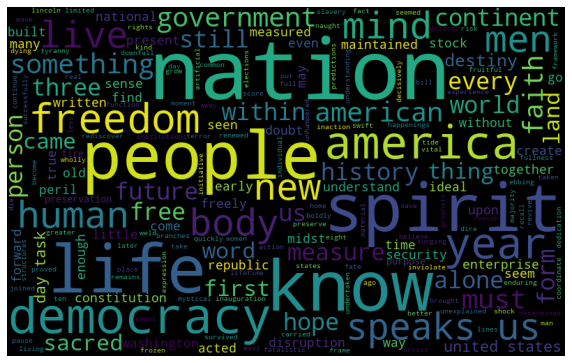

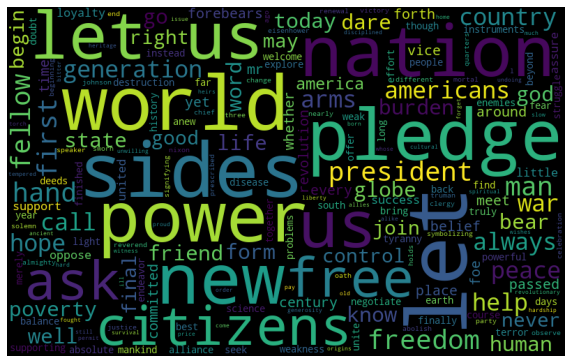

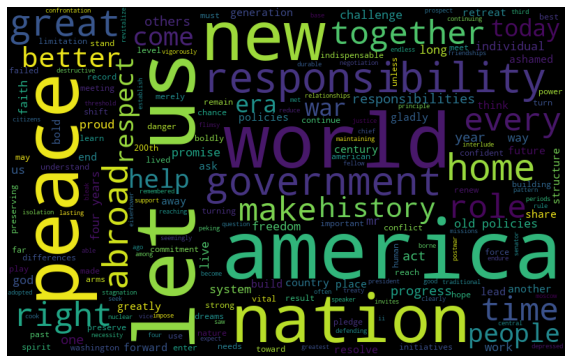

In [83]:
for i in range(3):
    wordcloud = WordCloud(width=800, height=500, max_font_size=120).generate(df.clean_speech[i])
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud)
    plt.axis('off')